- import all programs
- import train 80.csv file and val/ create source and dataset
- split every 10% (0.1 until 0.9)
- train models: ensemble and deepnet
- prediction on val 20%
- AUC
- add the deepnet curve

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import bigml.api
from bigml.api import BigML
api= BigML (project='project/5d94a52e5a213962e2000331')

# train_set = read_csv('train_dataset_80.csv')
# validation_set = read_csv('val.csv')

### Create the source and dataset for the train_dataset_80

In [2]:
train_source = api.create_source('train_dataset_80.csv')
api.ok(train_source)

True

In [3]:
train_dataset = api.create_dataset(train_source)
api.ok(train_dataset)

True

### Create the source and dataset for the val set

In [4]:
val_source = api.create_source('val.csv')
api.ok(val_source)

True

In [5]:
val_dataset = api.create_dataset(val_source)
api.ok(val_dataset)

True

## Curve Nb_data Vs AUC

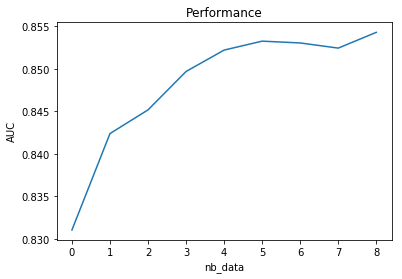

In [67]:
#Create a function named sum_split_auc to compare the auc from different split (split_rate)
def sum_split_auc(split_rate):
    
    # Split in function of the split_rate 
    train_set_splitted = api.create_dataset(train_dataset,
        {"name": "train_set_splitted", "sample_rate": split_rate, "seed": "my seed"})
    api.ok(train_set_splitted)
    
    #Train on the ensemble model
    ensemble = api.create_ensemble(train_set_splitted, {"objective_field":"SeriousDlqin2yrs"})
    api.ok(ensemble)
    
    #Prediction on the val_set
    batch_prediction_val_set = api.create_batch_prediction(ensemble, val_dataset,
        {"header": True, "all_fields": True,"prediction_name": "my_prediction", "probabilities": True})
    api.ok(batch_prediction_val_set)
    
    api.download_batch_prediction(batch_prediction_val_set,filename = 'Prediction_val_set_split.csv')
    
    #Define the dataframe with the csv
    df = pd.read_csv('Prediction_val_set_split.csv', index_col = 0)
    
    #Calculate the AUC
    pos = df.loc[df['SeriousDlqin2yrs'] == 1]
    neg = df.loc[df['SeriousDlqin2yrs'] == 0] 
    x = 0
    y = 0
    
    for threshold_pos in pos['1 probability']: 
        for threshold_neg in neg['1 probability']:
            if threshold_pos > threshold_neg:
                x += 1 
            y += 1  
    return(x/y) #AUC formula
    
# Define the n = 1/10 (100/10, do ten time the split)/Create the table Perfomance: nb_data/AUC
table = [sum_split_auc(n/10) for n in range(1,10)]
plt.xlabel("nb_data")
plt.ylabel("AUC")
plt.title("Performance")
plt.plot(table)

## AUC ensemble Vs AUC deepnet

0.8334016938354516
0.7570473370393834
0.8427321265247113
0.7772554155429774
0.8470304767131984
0.7853700604409222
0.8495236592094932
0.7810068935369932
0.8534391208335199
0.7820496003043105
0.8534654553950606
0.7814735916218853
0.8536855307544674
0.7854416514341475
0.8530620843938462
0.7851421290473317
0.8541814539958708
0.7713515437860853


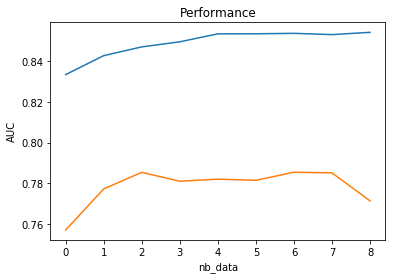

In [6]:
def sum_split_auc(split_rate):
    
    # Split in function of the split_rate 
    train_set_splitted = api.create_dataset(train_dataset,
        {"name": "train_set_splitted", "sample_rate": split_rate, "seed": "my seed"})
    api.ok(train_set_splitted)
    
    #Train on the ensemble model
    ensemble = api.create_ensemble(train_set_splitted, {"objective_field":"SeriousDlqin2yrs"})
    api.ok(ensemble)
    
    #Prediction on the val_set_ensemble
    batch_prediction_val_set_ensemble = api.create_batch_prediction(ensemble, val_dataset,
        {"header": True, "all_fields": True,"prediction_name": "my_prediction", "probabilities": True})
    api.ok(batch_prediction_val_set_ensemble)
    
    api.download_batch_prediction(batch_prediction_val_set_ensemble,filename = 'Prediction_val_set_split_ensemble.csv')
    
    #Define the dataframe with the csv
    df_ensemble = pd.read_csv('Prediction_val_set_split_ensemble.csv', index_col = 0)
    
    #Calculate the AUC_ensemble
    pos = df_ensemble.loc[df_ensemble['SeriousDlqin2yrs'] == 1]
    neg = df_ensemble.loc[df_ensemble['SeriousDlqin2yrs'] == 0] 
    x = 0
    y = 0
    
    for threshold_pos in pos['1 probability']: 
        for threshold_neg in neg['1 probability']:
            if threshold_pos > threshold_neg:
                x += 1 
            y += 1 
            auc_ensemble = x/y #AUC formula
    print(auc_ensemble) 

    #Train on the deepnet model
    deepnet = api.create_deepnet(train_set_splitted, {"objective_field":"SeriousDlqin2yrs"})
    api.ok(deepnet)
    
    #Prediction on the val_set_deepnet
    batch_prediction_val_set_deepnet = api.create_batch_prediction(deepnet, val_dataset,
        {"header": True, "all_fields": True,"prediction_name": "my_prediction", "probabilities": True})
    api.ok(batch_prediction_val_set_deepnet)
    
    api.download_batch_prediction(batch_prediction_val_set_deepnet,filename = 'Prediction_val_set_split_deepnet.csv')
    
    #Define the dataframe with the deepnet_csv
    df_deepnet = pd.read_csv('Prediction_val_set_split_deepnet.csv', index_col = 0)
    
    #Calculate the AUC_deepnet
    pos = df_deepnet.loc[df_deepnet['SeriousDlqin2yrs'] == 1]
    neg = df_deepnet.loc[df_deepnet['SeriousDlqin2yrs'] == 0] 
    x = 0
    y = 0
    
    for threshold_pos in pos['1 probability']: 
        for threshold_neg in neg['1 probability']:
            if threshold_pos > threshold_neg:
                x += 1 
            y += 1 
            auc_deepnet = x/y #AUC formula
    print(auc_deepnet) 
    
    return(auc_ensemble, auc_deepnet) #Return the two curves
    
    
# Define the n = 1/10 (100/10, do ten time the split)/Create the table Perfomance: nb_data/AUC
table = [sum_split_auc(n/10) for n in range(1,10)]
plt.xlabel("nb_data")
plt.ylabel("AUC")
plt.title("Performance")
plt.plot(table)